In [2]:
import pandas as pd

### Ejercicio 1

In [3]:
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('permisos_construccion.csv')

C:\Users\P\AppData\Local\Temp\ipykernel_15856\4171189080.py:2: DtypeWarning: Columns (22,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('permisos_construccion.csv')


### Ejercicio 3

#### a) Calcular y mostrar la cantidad de filas y columnas:


In [3]:
# Calcular la cantidad de filas y columnas
filas, columnas = df.shape

# Mostrar la cantidad de filas y columnas
print(f'Cantidad de filas: {filas}')
print(f'Cantidad de columnas: {columnas}')

Cantidad de filas: 198910
Cantidad de columnas: 43


#### b) Observar y mostrar las primeras 5 filas:

In [4]:
# Mostrar las primeras 5 filas del DataFrame
print(df.head(5))

  Permit Number  Permit Type  Permit Type Definition Permit Creation Date  \
0       M788927            8  otc alterations permit           05/23/2017   
1  201305318356            8  otc alterations permit           05/31/2013   
2  201705106205            8  otc alterations permit           05/10/2017   
3  201410279983            8  otc alterations permit           10/27/2014   
4  201310280388            8  otc alterations permit           10/28/2013   

  Block   Lot  Street Number Street Number Suffix Street Name Street Suffix  \
0  0215   001           1333                  NaN       jOnEs            St   
1  1810  017A           1483                  NaN        43rD            Av   
2  5700   027            431                  NaN    pReNtIsS            St   
3  0661   005           2020                  NaN        bUsH            St   
4  3642  051A            871                  NaN        cApP            St   

   ...  Existing Construction Type Existing Construction Type 

#### c) Evaluar la existencia de datos faltantes y duplicados. Cuantificarlos y calcular el porcentaje sobre el total de filas:

In [9]:
# Evaluar datos faltantes
datos_faltantes = df.isnull().sum()

# Calcular el porcentaje de datos faltantes sobre el total de filas
porcentaje_faltantes = (datos_faltantes / len(df)) * 100

# Mostrar datos faltantes y sus porcentajes
print('Datos faltantes por columna:')
print(datos_faltantes)
print('\nPorcentaje de datos faltantes por columna (%):')
print(porcentaje_faltantes)

# Evaluar datos duplicados
duplicados = df.duplicated().sum()

# Mostrar la cantidad de filas duplicadas
print(f'\nCantidad de filas duplicadas: {duplicados}')

# Calcular el porcentaje de filas duplicadas sobre el total de filas
porcentaje_duplicados = (duplicados / len(df)) * 100

# Mostrar el porcentaje de filas duplicadas
print(f'\nPorcentaje de filas duplicadas: {porcentaje_duplicados} %')

Datos faltantes por columna:
Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196694
Street Name                                    0
Street Suffix                               2768
Unit                                      169430
Unit Suffix                               196949
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14942
Completed Date                            101715
First Construction Document Date           14948
Structural Notification                 

#### d) Para los datos faltantes, evaluar posibles motivos de esto en cada caso:

In [ ]:
# Mostrar los valores únicos para cada columna que le falten datos
cantidad_filas = df.shape[0]

for column in df.columns:
    valores_unicos = df[column].unique()
    valores_faltantes = df[column].isnull().sum()

    if (valores_faltantes > 0):
        print(f'\nValores únicos en la columna {column}:')
        print(valores_unicos)
        print(f'Valores faltantes en la columna {valores_faltantes} de un total de {cantidad_filas} filas')


Valores únicos en la columna Street Number Suffix:
[nan 'B' 'A' 'V' 'D' 'K' 'C' 'F' 'H' 'E' 'L' 'J' 'R' 'P' 'I' 'N' 'G' '½'
 '0']
Valores faltantes en la columna 196694 de un total de 198910 filas

Valores únicos en la columna Street Suffix:
['St' 'Av' 'Bl' nan 'Wy' 'Dr' 'Hy' 'Tr' 'Rd' 'Ct' 'Pl' 'Pk' 'Ln' 'Cr' 'Pz'
 'Al' 'No' 'Rw' 'Wk' 'So' 'Hl' 'Sw']
Valores faltantes en la columna 2768 de un total de 198910 filas

Valores únicos en la columna Unit:
[      nan 0.000e+00 5.010e+02 3.000e+00 7.000e+00 2.000e+00 2.160e+02
 2.030e+02 2.020e+02 6.000e+00 1.000e+00 1.100e+01 1.300e+01 3.700e+01
 5.050e+02 3.210e+02 1.060e+02 4.000e+00 2.370e+02 1.170e+02 3.100e+01
 4.230e+02 3.010e+02 1.050e+02 5.100e+01 2.010e+02 1.040e+02 9.180e+02
 1.010e+02 1.401e+03 5.000e+00 3.050e+02 7.010e+02 8.010e+02 1.370e+03
 7.050e+02 4.070e+02 1.005e+03 3.600e+02 8.300e+02 8.020e+02 2.040e+02
 1.632e+03 1.004e+03 2.360e+02 1.020e+02 4.010e+02 5.070e+02 6.180e+02
 1.704e+03 1.602e+03 3.020e+02 6.080e+02 4.100e

Viendo los datos obtenidos anteriormente de las columnas que tienen datos vacíos y sus valores únicos deducimos los siguientes posibles motivos:

- Street Number Suffix: los datos vacíos pueden ser porque no se conocen o no apliquen para esta dirección. Esto se dedujo porque hay muchos vacíos.
- Street Suffix: los datos vacíos pueden ser porque no se conocen o no apliquen para esta dirección. Igualmente son pocos los faltantes.
- Unit: los datos vacíos pueden ser porque no se conocen o no apliquen para este edificio. Esto se dedujo porque hay muchos vacíos y hay mucha variedad de valores únicos.
- Unit Suffix: los datos vacíos pueden ser porque no se conocen o no apliquen para este edificio. Esto se dedujo porque hay muchos vacíos y hay mucha variedad de valores únicos.
- Descripción: no se ingresó, por lo tanto no se conoce. Son muy pocos los vacíos.
- Issued Date: tal vez hubo errores de no ingresar la fecha, los faltantes son pocos. Tal vez el permiso no se expidió aún.
- Completed Date: los faltantes de esta columna deberían corresponder a las construcciones que aún no finalizaron.
- First Construction Document Date: los faltantes deberían ser de aquellas obras en las que aún no se inicio la construcción.
- Structural Notification: hay una gran cantidad de datos faltantes, lo que significa que la gran mayoría de los permisos no tendrían que cumplir o tener en cuenta alguna notificación estructural.
- Number of Existing Stories: los datos faltantes podrían darse porque la construcción aún no ha comenzado y no tiene pisos actualmente. También, como se aclara en la metadata, este atributo no aplica para ciertos permisos. Este item aplicaría más para remodelaciones.
- Number of Proposed Stories: al igual que en los pisos existentes, los propuestos podrían no aplicar para ciertos permisos.
- Voluntary Soft-Story Retrofit: la mayoría de los datos son vacíos, esto puede ser porque solo unos pocos permisos cuentan con la protección contra terremotos.
- Fire Only Permit: Al igual que en la anterior, son pocos los permisos relacionados a la prevención de incendios.
- Permit Expiration Date: los faltantes en esta columna podrían ser porque simplemente los permisos no tienen una fecha de vencimiento o la misma es a futuro en el largo plazo.
- Estimated Cost: los faltantes aquí pueden ser debido a costos bajos que se omitieron, otros que son dificiles o no se tomo el trabajo de estimar.
- Revised Cost: aquí los faltantes son menos, quizás debido a una instancia obligatoria o recomendada de revisar el costo estimado.
- Existing Use: los faltantes en esta columna pueden ser debido a que la construcción aun no existe o no está terminada, o por usos diversos.
- Existing Units: los faltantes pueden ser debido a que la construcción aún no existe o no aplican las 'unidades' al permiso en cuestión.
- Proposed Use: los faltantes pueden ser porque el/los uso/s no está/n claro/s o no tiene uno específico.
- Proposed Units: los que faltan podrían ser porque se considera que no corresponde la división por unidades en esos permisos.
- Plansets: los faltantes podrían ser por falta de planos formales de construcción o que estén por fuera del permiso.
- TIDF Compliance: la mayoría faltan, y puede ser debido al desconocimiento de este requerimiento legal (por ser nuevo)
- Existing Construction Type: los que faltan pueden ser porque el tipo de construcción no está en las categorías existentes o no se le encuentra el tipo.
- Existing Construction Type Description: el mismo motivo que el anterior.
- Proposed Construction Type: igual al anterior
- Proposed Construction Type Description: igual al anterior
- Site Permit: tienen que ser valores verdadero o falso. Por lo tanto, los vacíos son porque no tiene permiso para construir en el sitio.
- Supervisor District: igual a los anteriores
- Neighborhoods - Analysis Boundaries: igual a los anteriores

#### e) Para variables discretas, evaluar los posibles valores de cada variable (valores únicos):

In [ ]:
# Mostrar los valores únicos y vacios para cada columna
for column in df.columns:
    valores_unicos = df[column].unique()
    print(f'\nValores únicos en la columna {column}:')
    print(valores_unicos)
    


Valores únicos en la columna Permit Number:
['M788927' '201305318356' '201705106205' ... '201607293741' '201701066691'
 '201604255599']

Valores únicos en la columna Permit Type:
[8 2 4 3 6 1 7 5]

Valores únicos en la columna Permit Type Definition:
['otc alterations permit' 'new construction wood frame' 'sign - erect'
 'additions alterations or repairs' 'demolitions' 'new construction'
 'wall or painted sign' 'grade or quarry or fill or excavate'
 ' otc alterations permit ' ' new construction '
 'otc alterations permit #' 'new construction #'
 ' additions alterations or repairs ']

Valores únicos en la columna Permit Creation Date:
['05/23/2017' '05/31/2013' '05/10/2017' ... '2017-02-10' '2016-11-14'
 '2013-03-06']

Valores únicos en la columna Block:
['0215' '1810' '5700' ... '4976' '6125' '6757']

Valores únicos en la columna Lot:
['001' '017A' '027' ... '018X' '031H' '030E']

Valores únicos en la columna Street Number:
[1333 1483  431 ... 4183 6237 4848]

Valores únicos en la col

#### f) Cuantificar los valores únicos del punto e) y realizar histogramas:

In [8]:
import matplotlib.pyplot as plt
import os

# Directorio donde se guardarán los histogramas
output_dir = "histogramas"
os.makedirs(output_dir, exist_ok=True)  # Crea el directorio si no existe
valores_discretos = ['Permit Type','Permit Type Definition','Current Status', 'Fire Only Permit','TIDF Compliance', 'Existing Construction Type','Existing Construction Type Description','Proposed Construction Type','Proposed Construction Type Description']


for column in valores_discretos:
    try:
        value_counts = df[column].value_counts()

        plt.rcParams['font.family'] = 'Arial'
        plt.figure(figsize=(16, 14))
        plt.barh(value_counts.index, value_counts.values)
        plt.title(f'Histograma de {column}')
        plt.xlabel('Frecuencia')
        plt.ylabel(column)

        # Ruta completa del archivo de salida
        output_file = os.path.join(output_dir, f"histograma_{column}.png")
        plt.savefig(output_file)  # Guardar el gráfico en un archivo
        plt.close()  # Cerrar la figura para liberar memoria
    
    except Exception as e:
        print(f"Error al procesar la columna {column}: {e}")


#### g) Evaluar la existencia de datos inconsistentes:

In [6]:
inconsistent_data = []

# Check for inconsistent data in numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    inconsistent_values = df[column].loc[pd.to_numeric(df[column], errors='coerce').isna() & df[column].notna()]
    if not inconsistent_values.empty:
        inconsistent_data.append((column, inconsistent_values))

# Check for inconsistent data in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    inconsistent_values = df[column].loc[~df[column].apply(lambda x: isinstance(x, str)) & df[column].notna()]
    if not inconsistent_values.empty:
        inconsistent_data.append((column, inconsistent_values))

# Print the inconsistent data
if inconsistent_data:
    print("Inconsistent data found:")
    for column, values in inconsistent_data:
        print(f"Column: {column}")
        print(f"Inconsistent values: \n{values}\n")
else:
    print("No inconsistent data found.")


# Filtrar y mostrar los datos inconsistentes en la columna 'Supervisor District' 
inconsistent_supervisor_district = df['Supervisor District'].loc[
    pd.to_numeric(df['Supervisor District'], errors='coerce').isna() & df['Supervisor District'].notna()
]

print("Datos inconsistentes en la columna 'Supervisor District':")
print(inconsistent_supervisor_district)

print()

# Mostrar un rango de filas alrededor de la fila 16384
print(df['Permit Number'].iloc[16370:16390])

print("Tipos de datos de las columnas:")
print(df.dtypes)


Inconsistent data found:
Column: Supervisor District
Inconsistent values: 
16384      7.0
16385      5.0
16386      7.0
16387      3.0
16388     11.0
          ... 
198905     7.0
198906    10.0
198907    10.0
198908     3.0
198909     6.0
Name: Supervisor District, Length: 148505, dtype: object

Datos inconsistentes en la columna 'Supervisor District':
2284      quince
97312     veinte
126129      diez
Name: Supervisor District, dtype: object

16370    201708043992
16371    201611283518
16372    201301248729
16373    201510291136
16374    201701207526
16375    201308063640
16376    201303263045
16377    201602169707
16378    201612024057
16379    201510230706
16380    201705318008
16381         M461987
16382    201502188590
16383         M585487
16384    201504163759
16385    201505015115
16386    201302049375
16387    201306058703
16388    201504284796
16389    201408042919
Name: Permit Number, dtype: object
Tipos de datos de las columnas:
Permit Number                              o

### Ejercicio 4

In [5]:
# Obtener y mostrar los valores únicos en la columna Permit Number
valores_unicos = df['Permit Number'].unique()
print('Valores únicos en "Permit Number":')
print(valores_unicos)

# Contar la cantidad de valores NaN en la columna 'Permit Number'
nan_count = df['Permit Number'].isna().sum()
print(f'Cantidad de valores NaN en la columna "Permit Number": {nan_count}')

Valores únicos en "Permit Number":
['M788927' '201305318356' '201705106205' ... '201607293741' '201701066691'
 '201604255599']
Cantidad de valores NaN en la columna "Permit Number": 0


In [69]:
# Encontrar y mostrar los valores duplicados en la columna Permit Number
duplicados = df[df.duplicated(subset=['Permit Number'], keep=False)]
print('Valores duplicados en "Permit Number":')
print(duplicados['Permit Number'].unique())

Valores duplicados en "Permit Number":
['201410279983' '201307161925' 'M501607' ... '201305015888' 'M479567'
 '201507080907']


Para esta primer columna de Permit Number se dejó así ya que no habían valores NaN. Los duplicados se dejan para analizar luego de analizar todas las demás variables para comparar toda la fila entera.

In [7]:
# Encontrar y mostrar los valores duplicados en la columna Permit Type
duplicados = df[df.duplicated(subset=['Permit Type'], keep=False)]
print('Valores duplicados en "Permit Type":')
print(duplicados['Permit Type'].unique())

Valores duplicados en "Permit Type":
[8 2 4 3 6 1 7 5]


Para la columna Permit Type no parecen haber inconsistencias ya que efectivamente el tipo de permiso se representa numericamente y no faltan datos.

In [8]:
# Obtener y mostrar los valores únicos en la columna Permit Type Definition
valores_unicos = df['Permit Type Definition'].unique()
print('Valores únicos en "Permit Type Definition":')
print(valores_unicos)

Valores únicos en "Permit Type Definition":
['otc alterations permit' 'new construction wood frame' 'sign - erect'
 'additions alterations or repairs' 'demolitions' 'new construction'
 'wall or painted sign' 'grade or quarry or fill or excavate'
 ' otc alterations permit ' ' new construction '
 'otc alterations permit #' 'new construction #'
 ' additions alterations or repairs ']


In [9]:
# Filtrar las filas que tienen el valor 'otc alterations permit #' en la columna Permit Type Definition
filtrados = df[df['Permit Type Definition'] == 'otc alterations permit #']

# Contar cuántos de esos registros son duplicados
duplicados = filtrados.duplicated().sum()

print(f'Cantidad de duplicados con el valor "otc alterations permit #": {duplicados}')

Cantidad de duplicados con el valor "otc alterations permit #": 0


In [10]:
# Encontrar y mostrar los valores duplicados en la columna Permit Type Definition
duplicados = df[df.duplicated(subset=['Permit Type Definition'], keep=False)]
print('Valores duplicados en "Permit Type Definition":')
print(duplicados['Permit Type Definition'].unique())

Valores duplicados en "Permit Type Definition":
['otc alterations permit' 'new construction wood frame' 'sign - erect'
 'additions alterations or repairs' 'demolitions' 'new construction'
 'wall or painted sign' 'grade or quarry or fill or excavate'
 ' otc alterations permit ' 'otc alterations permit #'
 'new construction #']


In [11]:
# Contar cuántas veces aparece el valor 'otc alterations permit' en la columna Permit Type Definition
cantidad = df['Permit Type Definition'].value_counts().get('otc alterations permit', 0)

print(f'Cantidad de veces que aparece "otc alterations permit": {cantidad}')

# Contar cuántas veces aparece el valor 'otc alterations permit #' en la columna Permit Type Definition
cantidad = df['Permit Type Definition'].value_counts().get('otc alterations permit #', 0)

print(f'Cantidad de veces que aparece "otc alterations permit #": {cantidad}')

Cantidad de veces que aparece "otc alterations permit": 178836
Cantidad de veces que aparece "otc alterations permit #": 8


In [12]:
# Eliminar espacios al principio y al final, y eliminar asteriscos en la columna Permit Type Definition
df['Permit Type Definition'] = df['Permit Type Definition'].str.replace('#', '', regex=False)
df['Permit Type Definition'] = df['Permit Type Definition'].str.strip()

# Verificar los valores únicos después de la corrección
valores_corregidos = df['Permit Type Definition'].unique()
print('Valores únicos después de la corrección en "Permit Type Definition":')
print(valores_corregidos)

Valores únicos después de la corrección en "Permit Type Definition":
['otc alterations permit' 'new construction wood frame' 'sign - erect'
 'additions alterations or repairs' 'demolitions' 'new construction'
 'wall or painted sign' 'grade or quarry or fill or excavate']


En los valores de la columna 'Permit Type Definition' no habían valores vacíos, pero si datos inconsistentes como espacios o '#' en algunos casos. En el caso de los valores que terminaban con '#', se contaron cuantas veces estaban sin y cuantas con. Como eran significativamente más los que no tenían el '#' se decidió quitar el '#'. Por lo tanto, se eliminaron estos espacios al principio y al final de los registros así como también los '#' que tenían algunos registros.

In [13]:
# Obtener y mostrar los valores únicos en la columna Permit Creation Date
valores_unicos = df['Permit Creation Date'].unique()
print('Valores únicos en "Permit Creation Date":')
print(valores_unicos)

Valores únicos en "Permit Creation Date":
['05/23/2017' '05/31/2013' '05/10/2017' ... '2017-02-10' '2016-11-14'
 '2013-03-06']


In [14]:
# Encontrar y mostrar los valores duplicados en la columna Permit Creation Date
duplicados = df[df.duplicated(subset=['Permit Creation Date'], keep=False)]
print('Valores duplicados en "Permit Creation Date":')
print(duplicados['Permit Creation Date'].unique())

Valores duplicados en "Permit Creation Date":
['05/23/2017' '05/31/2013' '05/10/2017' ... '02/04/2016' '11/17/2015'
 '03/28/2012']


In [15]:
# Reemplazar guiones '-' por barras '/' en la columna 'Permit Creation Date'
df['Permit Creation Date'] = df['Permit Creation Date'].str.replace('-', '/')

# Intentar convertir las fechas al formato de pandas, ignorando errores
df['Permit Creation Date'] = pd.to_datetime(df['Permit Creation Date'], errors='coerce', dayfirst=True)

# Formatear todas las fechas al formato 'DD/MM/YYYY'
df['Permit Creation Date'] = df['Permit Creation Date'].dt.strftime('%d/%m/%Y')

# Verificar los valores únicos después de la conversión
valores_unicos_fechas = df['Permit Creation Date'].unique()
print('Valores únicos después de la conversión en "Permit Creation Date":')
print(valores_unicos_fechas)


C:\Users\P\AppData\Local\Temp\ipykernel_15856\3837153806.py:5: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Permit Creation Date'] = pd.to_datetime(df['Permit Creation Date'], errors='coerce', dayfirst=True)


Valores únicos después de la conversión en "Permit Creation Date":
['23/05/2017' '31/05/2013' '10/05/2017' ... nan '26/12/2012' '28/03/2012']


In [16]:
# Contar la cantidad de valores NaN en la columna 'Permit Creation Date'
nan_count = df['Permit Creation Date'].isna().sum()

# Filtrar los registros con valores NaN en la columna 'Permit Creation Date'
nan_en_columna = df[df['Permit Creation Date'].isna()]

# Seleccionar las columnas de interés para estos registros
result = nan_en_columna[['First Construction Document Date', 'Current Status', 'Current Status Date']]

# Imprimir los resultados
print(f'Cantidad de valores NaN en la columna "Permit Creation Date": {nan_count}')
if (nan_count > 0):
    print(f'First Construction Document Date, Current Status, Current Status Date \n{result}')



Cantidad de valores NaN en la columna "Permit Creation Date": 5
First Construction Document Date, Current Status, Current Status Date 
       First Construction Document Date Current Status Current Status Date
20528                        08/08/2016       complete          12/15/2016
63125                        10/23/2013       complete          12/02/2013
63135                        03/09/2017         issued          03/09/2017
65326                        11/14/2016         issued          11/14/2016
169478                       03/06/2013       complete          11/12/2013


In [17]:
# Reemplazar los valores NaN en 'Permit Creation Date' con los valores de 'First Construction Document Date'
df['Permit Creation Date'] = df['Permit Creation Date'].fillna(df['First Construction Document Date'])

# Verificar los cambios
print(df[['Permit Creation Date', 'First Construction Document Date']].head())

  Permit Creation Date First Construction Document Date
0           23/05/2017                       05/23/2017
1           31/05/2013                       06/03/2013
2           10/05/2017                       05/11/2017
3           27/10/2014                       10/27/2014
4           28/10/2013                       10/28/2013


Para los valores de la columna 'Permit Creation Date' no se tuvieron que agregar datos ya que no faltaba ninguno. Lo que sí se cambio fue el formato de algunas fechas, ya que algunas estaban con '-' y otras con '/'. Además, a los pocos valores que eran 'NaN' (5), se les colocó la fecha del primer documento de construcción para tener una fecha aproximada.

In [18]:
# Obtener y mostrar los valores únicos en la columna Block
valores_unicos = df['Block'].unique()
print('Valores únicos en "Block":')
print(valores_unicos)

# Contar la cantidad de valores NaN en la columna 'Block'
nan_count = df['Block'].isna().sum()
print(f'Cantidad de valores NaN en la columna "Block": {nan_count}')

Valores únicos en "Block":
['0215' '1810' '5700' ... '4976' '6125' '6757']
Cantidad de valores NaN en la columna "Block": 0


In [19]:
# Encontrar y mostrar los valores duplicados en la columna Block
duplicados = df[df.duplicated(subset=['Block'], keep=False)]
print('Valores duplicados en "Block":')
print(duplicados['Block'].unique())

Valores duplicados en "Block":
['0215' '1810' '5700' ... '0256T' '5394' '5695']


Para los valores de la columna Block, no se cambió nada ya que no faltaban datos y no hay valores 'NaN', pareciendo estar sus valores correctos. Algunos tienen una letra pero puede llegar a ser parte de su dirección.

In [20]:
# Obtener y mostrar los valores únicos en la columna Lot
valores_unicos = df['Lot'].unique()
print('Valores únicos en "Lot":')
print(valores_unicos)

# Contar la cantidad de valores NaN en la columna 'Lot'
nan_count = df['Lot'].isna().sum()
print(f'Cantidad de valores NaN en la columna "Lot": {nan_count}')

Valores únicos en "Lot":
['001' '017A' '027' ... '018X' '031H' '030E']
Cantidad de valores NaN en la columna "Lot": 0


In [21]:
# Encontrar y mostrar los valores duplicados en la columna Lot
duplicados = df[df.duplicated(subset=['Lot'], keep=False)]
print('Valores duplicados en "Lot":')
print(duplicados['Lot'].unique())

Valores duplicados en "Lot":
['001' '017A' '027' '005' '051A' '076' '007' '009' '029' '090' '052'
 '016A' '058' '016' '037' '045' '004' '042' '002' '022' '012' '011' '028'
 '008' '021' '102' '026' '008B' '108' '020' '043A' '035' '003' '023' '006'
 '063' '017' '001P' '061' '160' '001X' '070' '009A' '043' '033' '018'
 '047' '036' '031' '030' '032' '014' '041' '001R' '163' '018B' '010' '046'
 '056' '073' '013' '074' '065A' '029B' '019' '015' '008A' '079' '024'
 '086' '038' '025' '031A' '060' '057' '001F' '010A' '001C' '053' '050'
 '040' '039' '044' '231' '003A' '049' '034' '093' '064' '001A' '080'
 '033A' '015A' '048' '002A' '640' '098' '123' '001D' '005B' '308' '067'
 '055' '147' '022A' '007A' '127' '081' '041A' '324' '068' '065' '066'
 '002O' '020A' '094' '211' '046A' '026A' '013B' '051' '120' '141' '001B'
 '112' '095' '009C' '157' '248' '077' '010E' '020C' '014A' '355' '183'
 '125' '118' '078' '003B' '251' '182' '137' '088' '010H' '238' '003N'
 '024A' '054D' '004B' '277' '250' '012A' '

Al igual que la columna anterior 'Block', para 'Lot' no se cambió nada ya que no faltaban datos y no hay valores 'NaN', pareciendo estar sus valores correctos. Algunos tienen una letra pero puede llegar a ser parte de su dirección.

In [22]:
# Obtener y mostrar los valores únicos en la columna Street Number
valores_unicos = df['Street Number'].unique()
print('Valores únicos en "Street Number":')
print(valores_unicos)

# Contar la cantidad de valores NaN en la columna 'Street Number'
nan_count = df['Street Number'].isna().sum()
print(f'Cantidad de valores NaN en la columna "Street Number": {nan_count}')

Valores únicos en "Street Number":
[1333 1483  431 ... 4183 6237 4848]
Cantidad de valores NaN en la columna "Street Number": 0


In [23]:
# Encontrar y mostrar los valores duplicados en la columna Street Number
duplicados = df[df.duplicated(subset=['Street Number'], keep=False)]
print('Valores duplicados en "Street Number":')
print(duplicados['Street Number'].unique())

Valores duplicados en "Street Number":
[1333 1483  431 ... 4623 3868 4511]


Al igual que las columnas anteriores 'Block' y 'Lot', para 'Street Number' no se cambió nada ya que no faltaban datos y no hay valores 'NaN', pareciendo estar sus valores correctos. Además, como se vio anteriormente, el tipo de dato es int64 indicando que no hay letras en esta columna de numero de calle.

In [24]:
# Obtener y mostrar los valores únicos en la columna Street Number Suffix
valores_unicos = df['Street Number Suffix'].unique()
print('Valores únicos en "Street Number Suffix":')
print(valores_unicos)

Valores únicos en "Street Number Suffix":
[nan 'B' 'A' 'V' 'D' 'K' 'C' 'F' 'H' 'E' 'L' 'J' 'R' 'P' 'I' 'N' 'G' '½'
 '0']


In [25]:
# Encontrar y mostrar los valores duplicados en la columna Street Number Suffix
duplicados = df[df.duplicated(subset=['Street Number Suffix'], keep=False)]
print('Valores duplicados en "Street Number Suffix":')
print(duplicados['Street Number Suffix'].unique())

Valores duplicados en "Street Number Suffix":
[nan 'B' 'A' 'V' 'D' 'K' 'C' 'F' 'H' 'E' 'L' 'J' 'R' 'P' 'I' 'N' 'G']


In [26]:
# Eliminar la columna 'Street Number Suffix'
df.drop('Street Number Suffix', axis=1, inplace=True)

Como hay un 98.89 % de datos faltantes del total de filas, se decidió borrar la columna 'Street Number Suffix' ya que no hay manera razonable de ponerle valores y además hay tantos valores faltantes que no aporta valor significativo al analisis.

In [27]:
# Obtener y mostrar los valores únicos en la columna Street Name
valores_unicos = df['Street Name'].unique()
print('Valores únicos en "Street Name":')
print(valores_unicos)

# Contar la cantidad de valores NaN en la columna 'Street Name'
nan_count = df['Street Name'].isna().sum()
print(f'Cantidad de valores NaN en la columna "Street Name": {nan_count}')

Valores únicos en "Street Name":
['jOnEs' '43rD' 'pReNtIsS' ... 'iGnAcIo' 'fErN' 'rIo']
Cantidad de valores NaN en la columna "Street Name": 0


In [28]:
# Encontrar y mostrar los valores duplicados en la columna Street Name
duplicados = df[df.duplicated(subset=['Street Name'], keep=False)]
print('Valores duplicados en "Street Name":')
print(duplicados['Street Name'].unique())

Valores duplicados en "Street Name":
['jOnEs' '43rD' 'pReNtIsS' ... 'aVeNuE I' 'cHuLa' 'lOtTiE BeNnEtT']


In [29]:
df['Street Name'] = df['Street Name'].str.title()
print("\nDespués de la limpieza:")
valores_unicos = df['Street Name'].unique()
print('Valores únicos en "Street Name":')
print(valores_unicos)


Después de la limpieza:
Valores únicos en "Street Name":
['Jones' '43Rd' 'Prentiss' ... 'Ignacio' 'Fern' 'Rio']


Para los valores de la columna 'Street Name' se les corrigió la inconsistencia 

---

de variar letras mayusculas y minusculas en cada palabra de los nombres de las calles. Se las puso todos con la primer letra mayúscula. Por otro lado, no tenía datos NaN o datos faltantes.

In [30]:
# Obtener y mostrar los valores únicos en la columna Street Suffix
valores_unicos = df['Street Suffix'].unique()
print('Valores únicos en "Street Suffix":')
print(valores_unicos)

# Contar la cantidad de valores NaN en la columna 'Street Suffix'
nan_count = df['Street Suffix'].isna().sum()
print(f'Cantidad de valores NaN en la columna "Street Suffix": {nan_count}')

Valores únicos en "Street Suffix":
['St' 'Av' 'Bl' nan 'Wy' 'Dr' 'Hy' 'Tr' 'Rd' 'Ct' 'Pl' 'Pk' 'Ln' 'Cr' 'Pz'
 'Al' 'No' 'Rw' 'Wk' 'So' 'Hl' 'Sw']
Cantidad de valores NaN en la columna "Street Suffix": 2768


In [31]:
# Encontrar y mostrar los valores duplicados en la columna Street Suffix
duplicados = df[df.duplicated(subset=['Street Suffix'], keep=False)]
print('Valores duplicados en "Street Suffix":')
print(duplicados['Street Suffix'].unique())

Valores duplicados en "Street Suffix":
['St' 'Av' 'Bl' nan 'Wy' 'Dr' 'Hy' 'Tr' 'Rd' 'Ct' 'Pl' 'Pk' 'Ln' 'Cr' 'Pz'
 'Al' 'No' 'Rw' 'Wk' 'So' 'Sw']


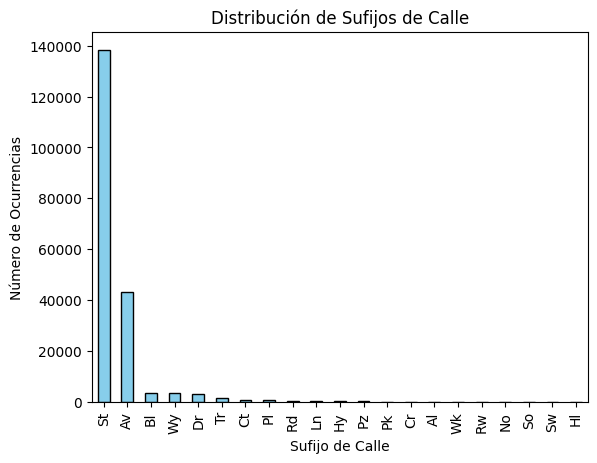

In [32]:
import matplotlib.pyplot as plt

# Contar frecuencias de cada valor en la columna
suffix_counts = df['Street Suffix'].value_counts()

# Crear el histograma
suffix_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución de Sufijos de Calle')
plt.xlabel('Sufijo de Calle')
plt.ylabel('Número de Ocurrencias')

# Mostrar el histograma
plt.show()


In [33]:
# Reemplazar los valores NaN en 'Street Suffix' con el valor 'St'
df['Street Suffix'] = df['Street Suffix'].fillna('St')

# Contar la cantidad de valores NaN en la columna 'Street Suffix'
nan_count = df['Street Suffix'].isna().sum()
print(f'Cantidad de valores NaN en la columna "Street Suffix": {nan_count}')

Cantidad de valores NaN en la columna "Street Suffix": 0


A los valores NaN de 'Street Suffix', que representaban un 1,3% de todos los registros, se le les colocó 'St'. Se dibujó un histograma con la cantidad de veces que aparecía cada uno, y 'St' era significativamente el más predominante. Por lo tanto, al ser pocos valores comparado al total, se asumieron que eran calles (St de Street).

In [34]:
# Obtener y mostrar los valores únicos en la columna Unit
valores_unicos = df['Unit'].unique()
print('Valores únicos en "Unit":')
print(valores_unicos)

# Contar la cantidad de valores NaN en la columna 'Unit'
nan_count = df['Unit'].isna().sum()
print(f'Cantidad de valores NaN en la columna "Unit": {nan_count}')

## voy a remplazar los valores nulos por un -1
print('Remplazando valores nulos por -1')
df['Unit'] = df['Unit'].fillna(-1)

nan_count = df['Unit'].isna().sum()
print(f'Ahorea la cantidad de valores NaN de la columna "Unit" es: {nan_count}')

Valores únicos en "Unit":
[      nan 0.000e+00 5.010e+02 3.000e+00 7.000e+00 2.000e+00 2.160e+02
 2.030e+02 2.020e+02 6.000e+00 1.000e+00 1.100e+01 1.300e+01 3.700e+01
 5.050e+02 3.210e+02 1.060e+02 4.000e+00 2.370e+02 1.170e+02 3.100e+01
 4.230e+02 3.010e+02 1.050e+02 5.100e+01 2.010e+02 1.040e+02 9.180e+02
 1.010e+02 1.401e+03 5.000e+00 3.050e+02 7.010e+02 8.010e+02 1.370e+03
 7.050e+02 4.070e+02 1.005e+03 3.600e+02 8.300e+02 8.020e+02 2.040e+02
 1.632e+03 1.004e+03 2.360e+02 1.020e+02 4.010e+02 5.070e+02 6.180e+02
 1.704e+03 1.602e+03 3.020e+02 6.080e+02 4.100e+02 2.130e+02 4.060e+02
 2.200e+01 3.830e+02 9.010e+02 6.170e+02 4.090e+02 3.040e+02 4.020e+02
 1.700e+03 1.600e+01 3.270e+02 8.000e+00 1.000e+01 1.150e+03 2.090e+02
 3.080e+02 1.116e+03 4.180e+02 2.230e+02 1.030e+02 1.007e+03 7.080e+02
 1.233e+03 1.404e+03 2.700e+01 9.000e+00 2.501e+03 4.400e+01 6.070e+02
 6.400e+02 5.903e+03 8.160e+02 1.408e+03 4.120e+02 1.700e+01 3.170e+02
 3.110e+02 3.101e+03 3.030e+02 2.150e+02 1.800e+01 

In [35]:
unit_suffix_values = df['Unit Suffix'].unique()
print(unit_suffix_values)

# Imprimir la cantidad de datos nulos en Unit Suffix
#print(f'Cantidad de valores nulos {df['Unit Suffix'].isnull().sum()}')

[nan 'C' "RESID'L" 'D' 'E' 'WEST' 'F' 'HOA' 'A' 'UPPER UNIT' 'B' 'H'
 'EAST' 'GPHA' '1/F' 'FRONT' 'Garage' 'UPPER' 'LOWER UNIT' 'O' 'N'
 'RESDL/REAR' 'CHILD DEV' 'RESIDENTIA' 'REAR UNIT' 'COMMERCIAL' 'BLDG 157'
 'RETAIL 1' 'W' 'M301' 'C132' 'J' 'M' 'COMML' 'BLDG 3E' 'OFFICE' '-A'
 'COML' 'FRONT BLDG' 'REAR' 'C-2001' 'M202' 'BLDG 1' 'C101' 'LOWER COML'
 'FRNT BLDG' 'PH-1' 'P' 'Y' 'LEVEL ONE' '1ST FLOOR' 'TH1' 'C103' 'C1'
 'LOWER' 'FRONT UNIT' 'R-1' 'K' 'G' 'C102' 'COMML-3' 'TH2' 'C-1' 'A102'
 'S' 'T' 'Commercial' 'COMMON ARE' 'BLDG 229' 'UPPR COMML' 'CU-3' 'I'
 '1/F FRONT' 'STORE' 'REAR BLDG' 'R' 'BLDG 449' 'OFFICE 2/F' 'B-A'
 'COMML 1' 'PH-4' 'M1' 'COM-1' 'BLD 7' '1503B' '-B' 'Parcel B'
 'FRNT RIGHT' 'STUDIO/TEC' 'TENTATIVE' 'RESIDENCE' 'PH1A' 'COMML-2' '0'
 'BLDG C' 'BLDG 3F' 'M101' 'C-2' "COM'L" '1/2' 'C-4' 'D4' 'U' 'RESIDL 3/F'
 'LEASE OFF' 'Parcel C' 'L' 'C100' 'PH2B' 'LEAS OFFIC' 'REAR G/F' '407'
 'BLDG 201' 'U-PH3' 'BLDG 3' '3/F' 'PH' 'UTILITY' '3RD FLOOR' 'FRNT ENTRA'
 'PH C' '3

In [36]:
# Eliminar la columna Unit Suffix
df = df.drop(columns=['Unit Suffix'])

#Como hay mas de un 99% de datos faltantes del total de filas,
#se decidió borrar la columna 'Unit Suffix' ya que no hay manera
#razonable de ponerle valores y además hay tantos valores faltantes
#que no aporta valor significativo al analisis.

In [37]:
description_values = df['Description'].unique()
print('There are', len(description_values), 'unique values in the Description column')

# Faltantes en la columna Description
missing_values = df['Description'].isnull().sum()
print('There are', missing_values, 'missing values in the Description column')

print(description_values)

# Faltantes en la columna Description
missing_values = df['Description'].isnull().sum()
print('There are', missing_values, 'missing values in the Description column')

# cambio los nulos por 'no hay descripcion'
df['Description'] = df['Description'].fillna('No description')

# Faltantes en la columna Description
missing_values = df['Description'].isnull().sum()
print('There are', missing_values, 'missing values in the Description column')

There are 134273 unique values in the Description column
There are 290 missing values in the Description column
['street space'
 'remodel kitchen: replace countertop, cabinets, sink, stove, hardwood floor & lighting.'
 'replacement of 4 windows; 2 located in lightwell and 2 at front. replaceing existing vinyl windows with new wood-clad windows. no horizontal mullion in living room window'
 ...
 'replace rotten wooden moldings in kind front stairs less than 50% replace'
 'revision to pa 2016-0926-8773; remove (e) storefront & doors, remove floor, ceiling & wall finishes for new. new storefront, (n) wall & ceiling finishes, (n) flooring with waterproofing in a (n) alcove. mep under pa#201503100377'
 '16th floor - (4) evacuation plans.']
There are 290 missing values in the Description column
There are 0 missing values in the Description column


In [38]:
unique_values = df['Current Status'].unique()
print(unique_values)

# Valores nulos
nan_count = df['Current Status'].isnull().sum()
print(f'Cantidad de valores nulos en "Current Status": {nan_count}')

# parece estar bien, no hay cosas que se refieran a lo mismo pero que esten escritas de manera diferente

['issued' 'complete' 'filed' 'approved' 'withdrawn' 'reinstated'
 'cancelled' 'revoked' 'expired' 'plancheck' 'suspend' 'incomplete'
 'disapproved' 'appeal']
Cantidad de valores nulos en "Current Status": 0


In [39]:
unique_current_status_dates = df['Current Status Date'].unique()
print(unique_current_status_dates)

print(df['Current Status Date'].value_counts())

#imprimir los faltantes
#print(f'Faltantes current ststus date: {df['Current Status Date'].isnull().sum()}')

# quiero que el formato sea dd/mm/yyyy
df['Current Status Date'] = pd.to_datetime(df['Current Status Date'], dayfirst=True, errors='coerce')
df['Current Status Date'] = df['Current Status Date'].dt.strftime('%d/%m/%Y')

#imprimir los unicos
print(df['Current Status Date'].unique())


#no hay valores nulos en la columna

['05/23/2017' '08/28/2013' '05/11/2017' ... '03/23/2013' '07/15/2017'
 '11/02/2014']
Current Status Date
09/15/2017    474
09/14/2017    404
06/15/2016    371
02/22/2018    364
02/23/2018    363
             ... 
03/27/2016      1
08/13/2016      1
12/25/2014      1
07/15/2017      1
11/02/2014      1
Name: count, Length: 1307, dtype: int64


C:\Users\P\AppData\Local\Temp\ipykernel_15856\2094803411.py:10: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Current Status Date'] = pd.to_datetime(df['Current Status Date'], dayfirst=True, errors='coerce')


['23/05/2017' '28/08/2013' '11/05/2017' ... '23/03/2013' '15/07/2017'
 '02/11/2014']


In [40]:
unique_filed_dates = df['Filed Date'].unique()
print(unique_filed_dates)

#imprimir los faltantes
#print(f'Faltantes filed date: {df['Filed Date'].isnull().sum()}')

# quiero que el formato sea dd/mm/yyyy
df['Filed Date'] = pd.to_datetime(df['Filed Date'], dayfirst=True, errors='coerce')
df['Filed Date'] = df['Filed Date'].dt.strftime('%d/%m/%Y')

unique_filed_dates = df['Filed Date'].unique()
print(unique_filed_dates)

#no hay valores nulos en la columna

['05/23/2017' '05/31/2013' '05/10/2017' ... '05/02/2013' '02/04/2016'
 '11/17/2015']


C:\Users\P\AppData\Local\Temp\ipykernel_15856\1020984054.py:8: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Filed Date'] = pd.to_datetime(df['Filed Date'], dayfirst=True, errors='coerce')


['23/05/2017' '31/05/2013' '10/05/2017' ... '02/05/2013' '04/02/2016'
 '17/11/2015']


In [41]:
unique_issued_dates = df['Issued Date'].unique()
print(unique_issued_dates)

# imprimir los valores nulos de la columna 'Issued Date'
missing_values = df['Issued Date'].isnull().sum()
print(f"Missing values in 'Issued Date' column: {missing_values}")

#imprimir el count
print(df['Issued Date'].value_counts())

#voy a llenar los faltantes con la fecha minima

df['Issued Date'] = pd.to_datetime(df['Issued Date'], dayfirst=True,errors='coerce')

fecha_minima = df['Issued Date'].min()
df['Issued Date'].fillna(fecha_minima, inplace=True)

df['Issued Date'] = df['Issued Date'].dt.strftime('%d/%m/%Y')

#imprimir el count
print(df['Issued Date'].value_counts())

# imprimir los valores nulos de la columna 'Issued Date'
missing_values = df['Issued Date'].isnull().sum()
print(f"Missing values in 'Issued Date' column: {missing_values}")

['05/23/2017' '06/03/2013' '05/11/2017' ... '05/24/2016' '06/05/2015'
 '12/12/2015']
Missing values in 'Issued Date' column: 14942
Issued Date
06/15/2016    341
07/26/2016    274
12/18/2015    272
12/10/2015    234
11/07/2017    233
             ... 
12/24/2014     64
05/24/2016     63
12/26/2014     55
12/31/2015     54
12/12/2015      2
Name: count, Length: 1289, dtype: int64


C:\Users\P\AppData\Local\Temp\ipykernel_15856\1363350698.py:13: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Issued Date'] = pd.to_datetime(df['Issued Date'], dayfirst=True,errors='coerce')
C:\Users\P\AppData\Local\Temp\ipykernel_15856\1363350698.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Issued Date'].fillna(fecha_minima, inplace=True)


Issued Date
02/01/2013    15010
15/06/2016      341
26/07/2016      274
18/12/2015      272
10/12/2015      234
              ...  
03/07/2015       64
24/05/2016       63
26/12/2014       55
31/12/2015       54
12/12/2015        2
Name: count, Length: 1289, dtype: int64
Missing values in 'Issued Date' column: 0


In [42]:
unique_completed_dates = df['Completed Date'].unique()
print(unique_completed_dates)

# imprimir los valores nulos de la columna 'Completed Date'
missing_values = df['Completed Date'].isnull().sum()
print(f"Missing values in 'Completed Date' column: {missing_values}")

#imprimir el count
print(df['Completed Date'].value_counts())

#voy a llenar los faltantes con '01/01/1900'
df['Completed Date'].fillna('01/01/1900', inplace=True)

#quiero que el formato sea dd/mm/yyyy
df['Completed Date'] = pd.to_datetime(df['Completed Date'], dayfirst=True,errors='coerce')
df['Completed Date'] = df['Completed Date'].dt.strftime('%d/%m/%Y')

#imprimir el count
print(df['Completed Date'].value_counts())

# imprimir los valores nulos de la columna 'Completed Date'
missing_values = df['Completed Date'].isnull().sum()
print(f"Missing values in 'Completed Date' column: {missing_values}")

[nan '08/28/2013' '12/31/2014' ... '01/04/2013' '03/23/2013' '11/02/2014']
Missing values in 'Completed Date' column: 101715
Completed Date
10/30/2015    206
01/02/2014    169
12/20/2017    162
11/26/2013    161
10/10/2017    160
             ... 
03/23/2013      3
01/04/2013      2
01/07/2013      1
12/25/2014      1
11/02/2014      1
Name: count, Length: 1300, dtype: int64


C:\Users\P\AppData\Local\Temp\ipykernel_15856\3689320843.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Completed Date'].fillna('01/01/1900', inplace=True)


Completed Date
01/01/1900    101715
01/02/2014       169
10/10/2017       160
12/02/2015       157
01/10/2017       148
               ...  
04/09/2017         3
04/02/2016         3
01/04/2013         2
01/07/2013         1
11/02/2014         1
Name: count, Length: 514, dtype: int64
Missing values in 'Completed Date' column: 59467


In [43]:
# imprimir los valores únicos de la columna 'First Construction Document Date'
unique_first_construction_dates = df['First Construction Document Date'].unique()
print(unique_first_construction_dates)

# imprimir los valores nulos de la columna 'First Construction Document Date'
missing_values = df['First Construction Document Date'].isnull().sum()
print(f"Missing values in 'First Construction Document Date' column: {missing_values}")

#voy a llenar los faltantes con '01/01/1900'
df['First Construction Document Date'].fillna('01/01/1900', inplace=True)

#quiero que el formato sea dd/mm/yyyy
df['First Construction Document Date'] = pd.to_datetime(df['First Construction Document Date'], dayfirst=True,errors='coerce')
df['First Construction Document Date'] = df['First Construction Document Date'].dt.strftime('%d/%m/%Y')

#imprimir el count
print(df['First Construction Document Date'].value_counts())

# imprimir los valores nulos de la columna 'First Construction Document Date'
missing_values = df['First Construction Document Date'].isnull().sum()
print(f"Missing values in 'First Construction Document Date' column: {missing_values}")

['05/23/2017' '06/03/2013' '05/11/2017' ... '02/04/2016' '05/24/2016'
 '06/05/2015']
Missing values in 'First Construction Document Date' column: 14948


C:\Users\P\AppData\Local\Temp\ipykernel_15856\1802906570.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['First Construction Document Date'].fillna('01/01/1900', inplace=True)
C:\Users\P\AppData\Local\Temp\ipykernel_15856\1802906570.py:13: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['First Construction Document Date'] = pd.to_datetime(df['First Construction Document Date'], dayfirst=True,errors='coerce')


First Construction Document Date
01/01/1900    14948
07/11/2016      339
01/11/2016      254
10/12/2015      236
07/11/2017      235
              ...  
03/07/2015       65
24/12/2014       62
31/12/2015       56
26/12/2014       53
24/05/2016       42
Name: count, Length: 1289, dtype: int64
Missing values in 'First Construction Document Date' column: 0


In [44]:
unique_values = df['Structural Notification'].unique()
print(unique_values)

# imprimir los valores nulos de la columna 'Structural Notification'
missing_values = df['Structural Notification'].isnull().sum()
print(f"Missing values in 'Structural Notification' column: {missing_values}")

# cambiar nulos por False
df['Structural Notification'].fillna(False, inplace=True)

# cambiar los valores 'Y' por True
df['Structural Notification'] = df['Structural Notification'].replace('Y', True)

# imprimir los valores unicos de la columna 'Structural Notification'
unique_values = df['Structural Notification'].unique()
print(unique_values)

# imprimir los valores nulos de la columna 'Structural Notification'
missing_values = df['Structural Notification'].isnull().sum()
print(f"Missing values in 'Structural Notification' column: {missing_values}")

[nan 'Y']
Missing values in 'Structural Notification' column: 191988
[False  True]
Missing values in 'Structural Notification' column: 0


C:\Users\P\AppData\Local\Temp\ipykernel_15856\2676685458.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Structural Notification'].fillna(False, inplace=True)
C:\Users\P\AppData\Local\Temp\ipykernel_15856\2676685458.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Structural Notifica

In [45]:
import numpy as np



                          #Number of Existing Stories---------------------------------------------------------------------------------------------------------------------------
#Number of Existing Stories float64
#Falta Number of Existing Stories 42788

# Evaluar datos duplicados
duplicados = df['Number of Existing Stories'].duplicated().sum()
print(duplicados)

#Dado este caso, voy a cambiar los NaN por -1, dado que algunos casos no aplican a la idea de pisos
# Sustituir los NaN en 'Number of Existing Stories' por -1
df['Number of Existing Stories'].fillna(-1, inplace=True)

#por otro lado hay valores decimales, como 2.5, pasaremos a INt
df['Number of Existing Stories'] = np.floor(df['Number of Existing Stories']).astype(int)

print(df['Number of Existing Stories'].value_counts())

                        #'Number of Proposed Stories'------------------------------------------------------------------------------------------------------------------------


df['Number of Proposed Stories'] = df['Number of Proposed Stories'].combine_first(df['Number of Existing Stories'])


# Asegurarse de que la columna sea del tipo adecuado (numérico)
df['Number of Proposed Stories'] = pd.to_numeric(df['Number of Proposed Stories'], errors='coerce')


# Redondear los valores decimales a enteros
df['Number of Proposed Stories'] = np.floor(df['Number of Proposed Stories']).astype(int)

# Mostrar la frecuencia de los valores
print(df['Number of Proposed Stories'].value_counts())

#Voluntary Soft-Story Retrofit-----------------------------------------------------------------------------------------------------------------------------------------

df['Voluntary Soft-Story Retrofit'].fillna(False, inplace=True)

# Paso 3: Reemplazar 'Y' con True y otros valores con False
df['Voluntary Soft-Story Retrofit'] = df['Voluntary Soft-Story Retrofit'].apply(lambda x: True if x == 'Y' else False)

# Comprobar que los cambios se han realizado correctamente
print(df['Voluntary Soft-Story Retrofit'].dtype)  # Debería mostrar dtype('bool')
print(df['Voluntary Soft-Story Retrofit'].unique())  # Debería mostrar [True, False]

#Fire Only Permit-------------------------------------------------------------------------------------------------------------------------------

df['Fire Only Permit'].fillna(False, inplace=True)

# Paso 3: Reemplazar 'Y' con True y otros valores con False
df['Fire Only Permit'] = df['Fire Only Permit'].apply(lambda x: True if x == 'Y' else False)

# Comprobar que los cambios se han realizado correctamente
print(df['Fire Only Permit'].dtype)  # Debería mostrar dtype('bool')
print(df['Fire Only Permit'].unique())  # Debería mostrar [True, False]

print(df['Fire Only Permit'].value_counts())

#Permit Expiration Date -----------------------------------------------------------------------------------------------------------------------------------
print(df['Permit Expiration Date'].value_counts())
print(df['Permit Expiration Date'].dtype)
df['Permit Expiration Date'] = pd.to_datetime(df['Permit Expiration Date'], dayfirst=True,errors='coerce')

#print(df['Permit Expiration Date'].value_counts())

fecha_maxima = df['Permit Expiration Date'].max()

df['Permit Expiration Date'].fillna(fecha_maxima, inplace=True)

print(df['Permit Expiration Date'].isna().sum())
print(df['Permit Expiration Date'].dtype)

df['Permit Expiration Date'] = df['Permit Expiration Date'].dt.strftime('%d/%m/%Y')

print(df['Permit Expiration Date'].value_counts())

#Estimated Cost-------------------------------------------------------------------------------
pd.set_option('display.float_format', '{:.2f}'.format)

#El valor minimo es 1.0
print(df['Estimated Cost'].isna().sum())
print(df['Estimated Cost'].value_counts())

#Aparece que uno de los precios es 1 y 0, es un claro outliers
valores_excluir = [1, 0]

media = df.loc[~df['Estimated Cost'].isin(valores_excluir), 'Estimated Cost'].mean()


df['Estimated Cost'].fillna(media, inplace=True)

#Remplazo 0 y 1 con la media
df['Estimated Cost'].replace([0, 1], media, inplace=True)

print(df['Estimated Cost'].isna().sum())


print(df['Estimated Cost'].value_counts())
print(df['Estimated Cost'].min())


#Revised Cost------------------------------------------------------------------
pd.set_option('display.float_format', '{:.2f}'.format)

# Excluir valores específicos antes de calcular la media
valores_a_excluir = [1, 0]  # El costo no pueden ser 0 dolares o 1 dolar

#Rellenaremos los NaN con los valores iniciales de la columna anterior
# Si hay valores NaN en 'Revised Cost', los rellenamos con los valores de 'Estimated Cost'
df['Revised Cost'] = df['Revised Cost'].combine_first(df['Estimated Cost'])


#Tomo la media sin contar los Outliers como 0 y 1
media_revisada = df.loc[~df['Revised Cost'].isin(valores_a_excluir), 'Revised Cost'].mean()

#Remplazo 0 y 1 con la media
df['Revised Cost'].replace([0, 1], media_revisada, inplace=True)

#Existing Use----------------------------------------------------------------------------------

#Para los casos en los que no sabemos dado que es NaN, usaremos "Desconocido"
df['Existing Use'].fillna("Desconocido",inplace=True)

#Usando la función Unique(), vemos que casos son claros de errores de escritura
#df['Existing Use'] = df['Existing Use'].replace('palabra_antigua', 'palabra_nueva')
df['Existing Use'] = df['Existing Use'].replace('nursing home non amb', 'nursing home non-ambulatory')
df['Existing Use'] = df['Existing Use'].replace('food/beverage hndlng', 'food/beverage handlng')
df['Existing Use'] = df['Existing Use'].replace('filling/service stn', 'filling/service station')
df['Existing Use'] = df['Existing Use'].replace('prkng garage/private', 'parking garage/private')
df['Existing Use'] = df['Existing Use'].replace('warehouse,no frnitur', 'warehouse,no furniture')

df['Existing Use'] = df['Existing Use'].replace('clinics-medic/dental', 'clinics-medical/dental')
df['Existing Use'] = df['Existing Use'].replace('misc group residns.', 'miscellaneous group residences')
df['Existing Use'] = df['Existing Use'].replace('recreation bldg', 'recreation building')
df['Existing Use'] = df['Existing Use'].replace('prkng garage/public', 'parking garage/public')
df['Existing Use'] = df['Existing Use'].replace('public assmbly other', 'public assembly other')

df['Existing Use'] = df['Existing Use'].replace('phone xchnge/equip', 'phone exchange/equipment')
df['Existing Use'] = df['Existing Use'].replace('dairies/dairy equip.', 'dairies/dairy equipment')

df['Existing Use'].unique()

#Proposed Use--------------------------------------------------------------------------------
print(df['Proposed Use'].isna().sum())
print(df['Proposed Use'].value_counts())

df['Proposed Use'] = df['Proposed Use'].combine_first(df['Existing Use'])

print(df['Proposed Use'].isna().sum())
print(df['Proposed Use'].value_counts())

#Existing Units --------------------------------------------------
print(df['Existing Units'].isna().sum())
print(df['Existing Units'].value_counts())

print(df['Existing Units'].min())

moda_unidades = df['Existing Units'].mode()[0]

df['Existing Units'].fillna(moda_unidades,inplace=True)

#Proposed Units-------------------------------------------------------------
print(df['Proposed Units'].isna().sum())
print(df['Proposed Units'].value_counts())
df['Proposed Units'] = df['Proposed Units'].combine_first(df['Existing Units'])
print("Resultado: ")
print(df['Proposed Units'].isna().sum())
print(df['Proposed Units'].value_counts())


198845
Number of Existing Stories
 2     52772
 3     45741
-1     42788
 4     16055
 1      8794
       ...  
 47        4
 56        4
 49        3
 62        2
 78        1
Name: count, Length: 63, dtype: int64


C:\Users\P\AppData\Local\Temp\ipykernel_15856\2228448232.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number of Existing Stories'].fillna(-1, inplace=True)


Number of Proposed Stories
 2     51877
 3     47249
-1     39377
 4     17890
 1      8638
       ...  
 56       11
 47        4
 62        4
 49        3
 78        1
Name: count, Length: 63, dtype: int64
bool
[False  True]


C:\Users\P\AppData\Local\Temp\ipykernel_15856\2228448232.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Voluntary Soft-Story Retrofit'].fillna(False, inplace=True)
C:\Users\P\AppData\Local\Temp\ipykernel_15856\2228448232.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

bool
[False  True]
Fire Only Permit
False    180082
True      18828
Name: count, dtype: int64
Permit Expiration Date
02/28/2018    302
02/24/2018    239
05/31/2018    234
05/04/2018    228
06/21/2018    228
             ... 
10/01/2021      1
05/08/2021      1
02/25/2019      1
04/12/2022      1
01/06/2020      1
Name: count, Length: 2232, dtype: int64
object
0
datetime64[ns]
Permit Expiration Date
21/02/2024    51885
28/02/2018      302
24/02/2018      239
31/05/2018      234
21/06/2018      228
              ...  
08/05/2021        1
25/02/2019        1
12/04/2022        1
26/09/2020        1
06/01/2020        1
Name: count, Length: 2232, dtype: int64
38068
Estimated Cost
1.00         17014
10000.00      6695
5000.00       6437
20000.00      5702
15000.00      4779
             ...  
125095.00        1
28126.00         1
5966.53          1
12440.00         1
648405.00        1
Name: count, Length: 11395, dtype: int64
0
Estimated Cost
189002.61    55082
10000.00      6695
5000.00     

C:\Users\P\AppData\Local\Temp\ipykernel_15856\2228448232.py:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Estimated Cost'].fillna(media, inplace=True)
C:\Users\P\AppData\Local\Temp\ipykernel_15856\2228448232.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

42441
Proposed Use
1 family dwelling       46348
apartments              43035
office                  23963
2 family dwelling       22062
retail sales             5079
                        ...  
temple                      2
dairies/dairy equip.        1
orphanage                   1
roofing materials           1
not applicable              1
Name: count, Length: 94, dtype: int64
0
Proposed Use
1 family dwelling       46531
apartments              43282
Desconocido             38806
office                  24524
2 family dwelling       22104
                        ...  
temple                      2
dairies/dairy equip.        1
orphanage                   1
roofing materials           1
not applicable              1
Name: count, Length: 104, dtype: int64
51543
Existing Units
1.00      47347
0.00      29135
2.00      21805
3.00       8616
6.00       6066
          ...  
550.00        1
211.00        1
159.00        1
289.00        1
674.00        1
Name: count, Length: 348, dtype:

C:\Users\P\AppData\Local\Temp\ipykernel_15856\2228448232.py:163: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Existing Units'].fillna(moda_unidades,inplace=True)


In [46]:
# Seleccionar un rango de columnas por índice
rango_columnas = df.iloc[:, 32:43]  # El índice 43 es excluyente, por lo que esto selecciona columnas de la 32 a la 42

# Encontrar duplicados en el rango de columnas seleccionado
#duplicados_rango = rango_columnas[rango_columnas.duplicated()]
#print("Duplicados en el rango de columnas del índice 32 al 42:")
#print(duplicados_rango)

#print(df.dtypes)
print(rango_columnas.dtypes)

# Find duplicate permit numbers
duplicate_TIDF_Compliance = df[df.duplicated(subset='TIDF Compliance', keep=False) & df['TIDF Compliance'].notna()]

#HAY MUCHOS VALORES NAN PERO NINGUNO DUPLICADO
tidf_null = df[df['TIDF Compliance'].isna()]
tidf_not_null = df[df['TIDF Compliance'].notna()]
print(tidf_not_null[['TIDF Compliance']])

# Print duplicate permit numbers
if len(duplicate_TIDF_Compliance) > 0:
    print("Duplicate TIDF Compliance found:")
    #print(duplicate_TIDF_Compliance[['Record ID', 'Permit Number', 'Street Number', 'Street Name']])


# Sort the duplicate permits by record ID
#duplicate_TIDF_Compliance = duplicate_TIDF_Compliance.sort_values(by='Record ID')

# Print the sorted duplicate permit numbers
if len(duplicate_TIDF_Compliance) > 0:
    print("Sorted duplicate TIDF Compliance found:")
    print(duplicate_TIDF_Compliance[['TIDF Compliance', 'Record ID',]])
else:
    print("No duplicate TIDF Compliance found.")


# SE PROCEDE A RELLENAR LOS NULL QUE SON CASI TODOS CON FALSE, Y SE CAMBIA UNA P A UNA Y; LAS Y SE REEMPLAZAN POR TRUE PARA QUE EL TIPO DE DATO SEA BOOLEAN

# Paso 1: Rellenar valores NaN con False
df['TIDF Compliance'].fillna(False, inplace=True)

# Paso 2: Reemplazar 'P' con 'Y'
df['TIDF Compliance'].replace('P', 'Y', inplace=True)

# Paso 3: Reemplazar 'Y' con True y otros valores con False
df['TIDF Compliance'] = df['TIDF Compliance'].apply(lambda x: True if x == 'Y' else False)

# Comprobar que los cambios se han realizado correctamente
print(df['TIDF Compliance'].dtype)  # Debería mostrar dtype('bool')
print(df['TIDF Compliance'].unique())  # Debería mostrar [True, False]


Existing Construction Type Description     object
Proposed Construction Type                float64
Proposed Construction Type Description     object
Site Permit                                object
Supervisor District                        object
Neighborhoods - Analysis Boundaries        object
Zipcode                                   float64
Location                                   object
Record ID                                   int64
dtype: object
       TIDF Compliance
9633                 P
153926               Y
No duplicate TIDF Compliance found.
bool
[False  True]


C:\Users\P\AppData\Local\Temp\ipykernel_15856\2556293574.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TIDF Compliance'].fillna(False, inplace=True)


In [47]:
# Find null values in the 'Construction Type' column BUSCO LOS NULOS
duplicate_construction_type = df[df['Existing Construction Type'].isna()]

# Print null 'Construction Type' values
if len(duplicate_construction_type) > 0:
    print("Duplicate 'Construction Type' found:")
    print(duplicate_construction_type[['Existing Construction Type', 'Record ID']])
else:
    print("No duplicate 'Construction Type' found.")

# Find duplicate values in the 'Construction Type exisitng description' column BUSCO LOS NULOS
duplicate_construction_type_des = df[df['Existing Construction Type Description'].isna()]

# Print duplicate 'Construction Type' values
if len(duplicate_construction_type_des) > 0:
    print("Duplicate 'Construction Type' found:")
    print(duplicate_construction_type_des[['Existing Construction Type Description', 'Record ID']])
else:
    print("No duplicate 'Construction Type' found.")

# BUSCO LOS NULOS EN UNO Y NO EN OTRO: INCOSISTENCIA

# Encontrar 'Record ID' con valores nulos solo en 'Existing Construction Type'
solo_null_construction_type = df[df['Existing Construction Type'].isna() & df['Existing Construction Type Description'].notna()]

# Encontrar 'Record ID' con valores nulos solo en 'Existing Construction Type Description'
solo_null_construction_type_des = df[df['Existing Construction Type'].notna() & df['Existing Construction Type Description'].isna()]

# Imprimir 'Record ID' con valores nulos solo en 'Existing Construction Type'
if len(solo_null_construction_type) > 0:
    print("Records with null 'Existing Construction Type' and non-null 'Existing Construction Type Description':")
    print(solo_null_construction_type[['Record ID', 'Existing Construction Type', 'Existing Construction Type Description']])
else:
    print("No records found with null 'Existing Construction Type' and non-null 'Existing Construction Type Description'.")

# Imprimir 'Record ID' con valores nulos solo en 'Existing Construction Type Description'
if len(solo_null_construction_type_des) > 0:
    print("Records with null 'Existing Construction Type Description' and non-null 'Existing Construction Type':")
    print(solo_null_construction_type_des[['Record ID', 'Existing Construction Type', 'Existing Construction Type Description']])
else:
    print("No records found with null 'Existing Construction Type Description' and non-null 'Existing Construction Type'.")


# Mostrar valores únicos de la columna 'Existing Construction Type'
valores_unicos_tipo = df['Existing Construction Type'].unique()
print("Valores únicos en 'Existing Construction Type':")
print(valores_unicos_tipo)

# Mostrar valores únicos de la columna 'Existing Construction Type Description'
valores_unicos_descripcion = df['Existing Construction Type Description'].unique()
print("\nValores únicos en 'Existing Construction Type Description':")
print(valores_unicos_descripcion)

# Filtrar filas donde 'Existing Construction Type' es igual a 99999
filtered_rows = df[df['Existing Construction Type'] == 99999]

# Imprimir la columna 'Existing Construction Type Description' de las filas filtradas
print(filtered_rows['Existing Construction Type Description'])


# HAY TRES FILAS CON 99999 Y TODAS COINCIDEN CON LA DESCRIPCION wood frame; HAY UNA FILA CON -99999 SIN DESCRIPCION, LE CAMBIO EL NUMERO Y PONGO 99999 Y DESCRIPCION WOOD FRAME

# Cambiar el valor de 'Existing Construction Type' a 99999
solo_null_construction_type_des['Existing Construction Type'] = 99999

# Cambiar el valor de 'Existing Construction Type Description' a 'Wood Frame'
solo_null_construction_type_des['Existing Construction Type Description'] = 'Wood Frame'

# Imprimir las filas modificadas para verificar los cambios
print(solo_null_construction_type_des[['Record ID', 'Existing Construction Type', 'Existing Construction Type Description']])


# CAMBIO LOS VALORES NAN A -1 EN "EXISTING CONSTRUCTION TYPE" Y DESCRIPTION A "NON AVAIVABLE"

# Cambiar los valores NaN en 'Existing Construction Type' a -1
df['Existing Construction Type'].fillna(-1, inplace=True)

# Cambiar los valores NaN en 'Existing Construction Type Description' a 'NON AVAILABLE'
df['Existing Construction Type Description'].fillna('NON AVAILABLE', inplace=True)


Duplicate 'Construction Type' found:
        Existing Construction Type      Record ID
0                              NaN  1464153232862
6                              NaN  1347642247334
7                              NaN  1463876236318
10                             NaN  1345693499144
18                             NaN   139996984337
...                            ...            ...
198891                         NaN  1292405246910
198895                         NaN  1308370472904
198896                         NaN   148985877418
198901                         NaN  1492023118112
198904                         NaN  1407979197645

[43369 rows x 2 columns]
Duplicate 'Construction Type' found:
       Existing Construction Type Description      Record ID
0                                         NaN  1464153232862
6                                         NaN  1347642247334
7                                         NaN  1463876236318
10                                        NaN  134569349

C:\Users\P\AppData\Local\Temp\ipykernel_15856\3926144628.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solo_null_construction_type_des['Existing Construction Type'] = 99999
C:\Users\P\AppData\Local\Temp\ipykernel_15856\3926144628.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solo_null_construction_type_des['Existing Construction Type Description'] = 'Wood Frame'
C:\Users\P\AppData\Local\Temp\ipykernel_15856\3926144628.py:76: FutureWarning: A value is trying to be set on a copy of a DataFrame o

In [48]:
# Buscar valores nulos en 'Proposed Construction Type'
duplicate_proposed_construction_type = df[df['Proposed Construction Type'].isna()]

# Imprimir registros con valores nulos en 'Proposed Construction Type'
if len(duplicate_proposed_construction_type) > 0:
    print("Records with null 'Proposed Construction Type':")
    print(duplicate_proposed_construction_type[['Proposed Construction Type', 'Record ID']])
else:
    print("No records found with null 'Proposed Construction Type'.")

# Buscar valores nulos en 'Proposed Construction Type Description'
duplicate_proposed_construction_type_des = df[df['Proposed Construction Type Description'].isna()]

# Imprimir registros con valores nulos en 'Proposed Construction Type Description'
if len(duplicate_proposed_construction_type_des) > 0:
    print("Records with null 'Proposed Construction Type Description':")
    print(duplicate_proposed_construction_type_des[['Proposed Construction Type Description', 'Record ID']])
else:
    print("No records found with null 'Proposed Construction Type Description'.")

# Buscar inconsistencias: valores nulos en una columna pero no en la otra

# Encontrar 'Record ID' con valores nulos solo en 'Proposed Construction Type'
solo_null_proposed_construction_type = df[df['Proposed Construction Type'].isna() & df['Proposed Construction Type Description'].notna()]

# Encontrar 'Record ID' con valores nulos solo en 'Proposed Construction Type Description'
solo_null_proposed_construction_type_des = df[df['Proposed Construction Type'].notna() & df['Proposed Construction Type Description'].isna()]

# Imprimir 'Record ID' con valores nulos solo en 'Proposed Construction Type'
if len(solo_null_proposed_construction_type) > 0:
    print("Records with null 'Proposed Construction Type' and non-null 'Proposed Construction Type Description':")
    print(solo_null_proposed_construction_type[['Record ID', 'Proposed Construction Type', 'Proposed Construction Type Description']])
else:
    print("No records found with null 'Proposed Construction Type' and non-null 'Proposed Construction Type Description'.")

# Imprimir 'Record ID' con valores nulos solo en 'Proposed Construction Type Description'
if len(solo_null_proposed_construction_type_des) > 0:
    print("Records with null 'Proposed Construction Type Description' and non-null 'Proposed Construction Type':")
    print(solo_null_proposed_construction_type_des[['Record ID', 'Proposed Construction Type', 'Proposed Construction Type Description']])
else:
    print("No records found with null 'Proposed Construction Type Description' and non-null 'Proposed Construction Type'.")


# Mostrar valores únicos de la columna 'Existing Construction Type'
valores_unicos_tipo_p = df['Proposed Construction Type'].unique()
print("Valores únicos en 'Proposed Construction Type':")
print(valores_unicos_tipo_p)

# Mostrar valores únicos de la columna 'Existing Construction Type Description'
valores_unicos_descripcion_p = df['Proposed Construction Type Description'].unique()
print("\nValores únicos en 'Proposed Construction Type Description':")
print(valores_unicos_descripcion_p)


# CAMBIO LOS VALORES NAN A -1 EN "EXISTING CONSTRUCTION TYPE" Y  EN DESCRIPTION A "NON AVAIVABLE"

# Cambiar los valores NaN en 'Existing Construction Type' a -1
df['Proposed Construction Type'].fillna(-1, inplace=True)

# Cambiar los valores NaN en 'Existing Construction Type Description' a 'NON AVAILABLE'
df['Proposed Construction Type Description'].fillna('NON AVAILABLE', inplace=True)


Records with null 'Proposed Construction Type':
        Proposed Construction Type      Record ID
0                              NaN  1464153232862
6                              NaN  1347642247334
7                              NaN  1463876236318
16                             NaN  1317862102479
18                             NaN   139996984337
...                            ...            ...
198891                         NaN  1292405246910
198895                         NaN  1308370472904
198896                         NaN   148985877418
198901                         NaN  1492023118112
198904                         NaN  1407979197645

[43165 rows x 2 columns]
Records with null 'Proposed Construction Type Description':
       Proposed Construction Type Description      Record ID
0                                         NaN  1464153232862
6                                         NaN  1347642247334
7                                         NaN  1463876236318
16                    

C:\Users\P\AppData\Local\Temp\ipykernel_15856\469812242.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Proposed Construction Type'].fillna(-1, inplace=True)
C:\Users\P\AppData\Local\Temp\ipykernel_15856\469812242.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [49]:
# Check for duplicates in 'Site Permit'
duplicate_site_permit = df[df.duplicated(subset='Site Permit', keep=False) & df['Site Permit'].notna()]

# Print duplicate values in 'Site Permit'
if len(duplicate_site_permit) > 0:
    print("Duplicate 'Site Permit' found:")
    print(duplicate_site_permit[['Site Permit', 'Record ID']])
else:
    print("No duplicate 'Site Permit' found.")

valores_unicos_sp=df['Site Permit'].unique()
print("Valores únicos en 'Site Permit':")
print(valores_unicos_sp)

# Reemplazar 'Y' con True y otros valores con False y cambiar a boolean
df['Site Permit'] = df['Site Permit'].apply(lambda x: True if x == 'Y' else False)

# Comprobar que los cambios se han realizado correctamente
print(df['Site Permit'].dtype)  # Debería mostrar dtype('bool')
print(df['Site Permit'].unique())  # Debería mostrar [True, False]


Duplicate 'Site Permit' found:
       Site Permit      Record ID
10               Y  1345693499144
138              Y  1328538204136
180              Y  1445840284463
200              Y   143211977531
218              Y   145562596098
...            ...            ...
198691           Y  1410062205386
198793           Y  1401740453088
198814           Y  1412876457991
198839           Y  1347093499186
198840           Y  1374372490432

[5360 rows x 2 columns]
Valores únicos en 'Site Permit':
[nan 'Y']
bool
[False  True]


In [50]:
# Check for duplicates in 'Supervisor District'
duplicate_supervisor_district = df[df.duplicated(subset='Supervisor District', keep=False) & df['Supervisor District'].notna()]

# Print duplicate values in 'Supervisor District'
if len(duplicate_supervisor_district) > 0:
    print("Duplicate 'Supervisor District' found:")
    print(duplicate_supervisor_district[['Supervisor District', 'Record ID']])
else:
    print("No duplicate 'Supervisor District' found.")

valores_unicos_sd=df['Supervisor District'].unique()
print("Valores únicos en 'Supervisor District':")
print(valores_unicos_sd)

# HAY VALORES QUE SON LOS NUMEROS ESCRITOS, LOS REEMPLAZO POR EL NUMERO

# Reemplazar valores de 'Supervisor District' que contienen texto con el número correspondiente, hay numeros que aparecen como texto

df['Supervisor District'] = df['Supervisor District'].replace({"quince": 15, "veinte":20, "diez":10})

#Cambiar los "numeros" a numeros
df['Supervisor District'] = pd.to_numeric(df['Supervisor District'], errors='coerce')
print(df['Supervisor District'].dtype)

valores_unicos_sd=df['Supervisor District'].unique()
print("Valores únicos en 'Supervisor District':")
print(valores_unicos_sd)

# Reemplazar valores nulos en 'Supervisor District' con -1
df['Supervisor District'].fillna(-1, inplace=True)

Duplicate 'Supervisor District' found:
       Supervisor District      Record ID
0                      3.0  1464153232862
1                      4.0  1306559115258
2                      9.0  1462579187173
3                      5.0   136037778128
4                      9.0  1322242163712
...                    ...            ...
198905                7.00  1418495226171
198906               10.00  1400885168656
198907               10.00  1431897172643
198908                3.00  1449660232064
198909                6.00  1420790164534

[197188 rows x 2 columns]
Valores únicos en 'Supervisor District':
['3.0' '4.0' '9.0' '5.0' '8.0' '2.0' '6.0' '10.0' '1.0' '7.0' '11.0' nan
 'quince' 7.0 5.0 3.0 11.0 4.0 8.0 2.0 9.0 6.0 1.0 10.0 'veinte' 'diez']
float64
Valores únicos en 'Supervisor District':
[ 3.  4.  9.  5.  8.  2.  6. 10.  1.  7. 11. nan 15. 20.]


C:\Users\P\AppData\Local\Temp\ipykernel_15856\171004858.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Supervisor District'].fillna(-1, inplace=True)


In [51]:
# Check for duplicates in 'Neighborhoods - Analysis Boundaries'
duplicate_neighborhoods = df[df.duplicated(subset='Neighborhoods - Analysis Boundaries', keep=False) & df['Neighborhoods - Analysis Boundaries'].notna()]

# Print duplicate values in 'Neighborhoods - Analysis Boundaries'
if len(duplicate_neighborhoods) > 0:
    print("Duplicate 'Neighborhoods - Analysis Boundaries' found:")
    print(duplicate_neighborhoods[['Neighborhoods - Analysis Boundaries', 'Record ID']])
else:
    print("No duplicate 'Neighborhoods - Analysis Boundaries' found.")

valores_unicos_nb=df['Neighborhoods - Analysis Boundaries'].unique()
print("Valores únicos en 'Neighborhoods - Analysis Boundaries':")
print(valores_unicos_nb)

# Reemplazar valores nulos en 'Neighborhoods - Analysis Boundaries' con 'NON AVAILABLE'

df['Neighborhoods - Analysis Boundaries'].fillna('NON AVAILABLE', inplace=True)


Duplicate 'Neighborhoods - Analysis Boundaries' found:
       Neighborhoods - Analysis Boundaries      Record ID
0                                 Nob Hill  1464153232862
1                          Sunset/Parkside  1306559115258
2                           Bernal Heights  1462579187173
3                          Pacific Heights   136037778128
4                                  Mission  1322242163712
...                                    ...            ...
198905                           Lakeshore  1418495226171
198906                        Potrero Hill  1400885168656
198907                             Mission  1431897172643
198908                           Chinatown  1449660232064
198909      Financial District/South Beach  1420790164534

[197185 rows x 2 columns]
Valores únicos en 'Neighborhoods - Analysis Boundaries':
['Nob Hill' 'Sunset/Parkside' 'Bernal Heights' 'Pacific Heights' 'Mission'
 'Castro/Upper Market' 'Financial District/South Beach' 'Chinatown'
 'South of Market' 'In

C:\Users\P\AppData\Local\Temp\ipykernel_15856\2701242411.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Neighborhoods - Analysis Boundaries'].fillna('NON AVAILABLE', inplace=True)


In [52]:
# Check for duplicates in 'Zipcode'
duplicate_zipcode = df[df.duplicated(subset='Zipcode', keep=False) & df['Zipcode'].notna()]

# Print duplicate values in 'Zipcode'
if len(duplicate_zipcode) > 0:
    print("Duplicate 'Zipcode' found:")
    print(duplicate_zipcode[['Zipcode', 'Record ID']])
else:
    print("No duplicate 'Zipcode' found.")

valores_unicos_zc=df['Zipcode'].unique()
print("Valores únicos en 'Zipcode':")
print(valores_unicos_zc)

# Reemplazar valores nulos en 'Zipcode' con -1
df['Zipcode'].fillna(-1, inplace=True)




Duplicate 'Zipcode' found:
        Zipcode      Record ID
0      94109.00  1464153232862
1      94122.00  1306559115258
2      94110.00  1462579187173
3      94115.00   136037778128
4      94110.00  1322242163712
...         ...            ...
198905 94132.00  1418495226171
198906 94107.00  1400885168656
198907 94110.00  1431897172643
198908 94133.00  1449660232064
198909 94105.00  1420790164534

[197194 rows x 2 columns]
Valores únicos en 'Zipcode':
[94109. 94122. 94110. 94115. 94114. 94105. 94111. 94107. 94118. 94124.
 94108. 94121. 94123. 94133. 94117. 94131. 94127. 94103. 94132. 94112.
 94116. 94102. 94158. 94104.    nan 94134. 94130. 94129.]


C:\Users\P\AppData\Local\Temp\ipykernel_15856\21122046.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Zipcode'].fillna(-1, inplace=True)


In [68]:
# Check for duplicates in 'Record ID'
duplicate_record_id = df[df.duplicated(subset='Record ID', keep=False) & df['Record ID'].notna()]

# Print duplicate values in 'Record ID'
if len(duplicate_record_id) > 0:
    print("Duplicate 'Record ID' found:")
    print(duplicate_record_id[['Record ID']])
else:
    print("No duplicate 'Record ID' found.")


No duplicate 'Record ID' found.


In [57]:
# Aplicar la función str.strip() a todas las celdas de tipo cadena para borrar los espacios al principio y al final de cada celda
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\P\AppData\Local\Temp\ipykernel_15856\1002383263.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [59]:
# Evaluar datos duplicados
duplicados = df.duplicated().sum()

# Mostrar la cantidad de filas duplicadas
print(f'\nCantidad de filas duplicadas: {duplicados}')


Cantidad de filas duplicadas: 10


In [63]:
# Imprimir la fila 437
print("Fila 435:")
print(df.iloc[435])

# Imprimir la fila 171466
print("\nFila 171464:")
print(df.iloc[171464])


Fila 435:
Permit Number                                                                  201304084005
Permit Type                                                                               8
Permit Type Definition                                               otc alterations permit
Permit Creation Date                                                             08/04/2013
Block                                                                                  1674
Lot                                                                                     023
Street Number                                                                          5528
Street Name                                                                          Fulton
Street Suffix                                                                            St
Unit                                                                                   0.00
Description                               kitchen cabinet, install 4 c

In [65]:
# Eliminar filas duplicadas basándose en todas las columnas
df = df.drop_duplicates(keep='first')

# Evaluar datos duplicados
duplicados = df.duplicated().sum()

# Mostrar la cantidad de filas duplicadas
print(f'\nCantidad de filas duplicadas: {duplicados}')


Cantidad de filas duplicadas: 0


### Ejercicio 5

In [70]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Definir las columnas que quedan dentro de las discretas y continuas que no deben ser normalizadas
columns_to_exclude = ['Zipcode', 'Record ID']

# Asegurarse de que las columnas a excluir están presentes en el DataFrame
columns_to_exclude = [col for col in columns_to_exclude if col in numeric_columns]

# Distinguir entre discretas y continuas, excluyendo las columnas especificadas
threshold = 20
continuous_columns = [col for col in numeric_columns if col not in columns_to_exclude and df[col].nunique() > threshold]

# Validación manual
print(df[continuous_columns].describe())

# Crear un objeto MinMaxScaler para normalizar los datos entre 0 y 1
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas continuas numéricas
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# Verificar las primeras filas después de la normalización
print(df.head())


       Street Number      Unit  Number of Existing Stories  \
count      198900.00 198900.00                   198900.00   
mean         1121.73     10.79                        4.26   
std          1135.77    129.01                        8.11   
min             0.00     -1.00                       -1.00   
25%           235.00     -1.00                        1.00   
50%           710.00     -1.00                        2.00   
75%          1700.00     -1.00                        3.00   
max          8400.00   6004.00                       78.00   

       Number of Proposed Stories  Estimated Cost  Revised Cost  \
count                   198900.00       198900.00     198900.00   
mean                         4.41       188959.41     212972.76   
std                          8.17      3264137.42    3651801.05   
min                         -1.00            2.00          0.01   
25%                          2.00         8000.00       9000.00   
50%                          2.00      

### Ejercicio 6

In [71]:
# Se instala librería
#!pip install ydata_profiling
# Importaciones
import pandas as pd
from ydata_profiling import ProfileReport

# Se ejecuta reporte
profile = ProfileReport(df, title="Reporte del Analisis", explorative=True)
# Se guarda reporte como html
profile.to_file(output_file="ProfilingDatasetNuevo_html.html")

# Se lee el csv original
dfOriginal = pd.read_csv('permisos_construccion.csv')
# Se ejecuta reporte
profile = ProfileReport(dfOriginal, title="Reporte de Datos Originales", explorative=True)
# Se guarda reporte como html
profile.to_file(output_file="ProfilingDatasetOriginal_html.html")
# Se guarda reporte como json
#profile.to_file(output_file="ProfilingDatasetOriginal_json.json”)

C:\Users\P\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]
C:\Users\P\AppData\Local\Temp\ipykernel_15856\1522364813.py:13: DtypeWarning: Columns (22,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  dfOriginal = pd.read_csv('permisos_construccion.csv')
Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.00it/s]
